In [130]:
import numpy as np
import pandas as pd
import pickle
import project_tools as tools
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Read all Data into Notebook
original_stats = tools.get_weekly_stats()
original_games = tools.get_data('games', 2004)
original_records = tools.get_data('records', 2004)
original_teams = pd.read_json('https://api.collegefootballdata.com/teams')

In [22]:
# Reset indecis of all dataframes
original_stats = original_stats.reset_index(drop=True)
original_games = original_games.reset_index(drop=True)
original_records = original_records.reset_index(drop=True)
original_teams = original_teams.reset_index(drop=True)

In [24]:
# Save all Data into Pickle File
with open('cfb_data.pkl','wb') as f:
    pickle.dump([original_stats, original_games, original_records, original_teams], f )

In [2]:
# Load all Data into Pickle File
with open('cfb_data.pkl', 'rb') as f:
    original_stats, original_games, original_records, original_teams = pickle.load(f)

In [152]:
games = tools.get_games_df()

['firstDowns', 'fourthDownConversions', 'fourthDowns', 'fumblesLost', 'fumblesRecovered', 'interceptionTDs', 'interceptionYards', 'interceptions', 'netPassingYards', 'passAttempts', 'passCompletions', 'passesIntercepted', 'passingTDs', 'penalties', 'penaltyYards', 'possessionTime', 'puntReturnTDs', 'puntReturnYards', 'puntReturns', 'rushingAttempts', 'rushingTDs', 'rushingYards', 'thirdDownConversions', 'thirdDowns', 'totalYards', 'turnovers']


In [153]:
games

,season,week,home_team,away_team,result,home_games,away_games,firstDowns_spread,fourthDownConversions_spread,fourthDowns_spread,fumblesLost_spread,fumblesRecovered_spread,interceptionTDs_spread,interceptionYards_spread,interceptions_spread,netPassingYards_spread,passAttempts_spread,passCompletions_spread,passesIntercepted_spread,passingTDs_spread,penalties_spread,penaltyYards_spread,possessionTime_spread,puntReturnTDs_spread,puntReturnYards_spread,puntReturns_spread,rushingAttempts_spread,rushingTDs_spread,rushingYards_spread,thirdDownConversions_spread,thirdDowns_spread,totalYards_spread,turnovers_spread,home_for,home_against,away_for,away_against
0,2004,1,Virginia Tech,USC,-11.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004,2,Eastern Michigan,Buffalo,3.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2004,2,Utah,Texas A&M,20.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2004,2,Ball State,Boston College,-8.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2004,2,TCU,Northwestern,3.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11187,2019,15,LSU,Georgia,27.0,12.0,12.0,6.416667,0.166667,0.083333,-0.166667,-0.416667,0.000000,-2.250000,0.250000,169.416667,8.000000,10.000000,0.666667,1.833333,0.500000,11.500000,-201.666667,0.083333,-3.166667,-0.333333,-3.916667,0.750000,-29.583333,0.166667,-1.416667,139.833333,0.083333,48.666667,22.083333,32.916667,10.416667
11188,2019,15,Boise State,Hawai'i,21.0,12.0,13.0,-2.205128,-0.724359,-0.993590,-0.339744,0.698718,-0.224359,-15.307692,-0.564103,-61.128205,-9.461538,-6.352564,-0.179487,-0.589744,-1.019231,-8.551282,-24.384615,0.089744,14.147436,0.371795,10.025641,0.538462,25.608974,1.064103,2.083333,-35.519231,-0.903846,37.333333,21.500000,35.384615,31.769231
11189,2019,15,Clemson,Virginia,45.0,12.0,12.0,5.666667,-0.166667,-0.166667,-0.166667,0.500000,0.000000,-4.166667,-0.083333,23.500000,-1.750000,-0.833333,0.250000,1.416667,0.666667,-2.750000,-129.750000,0.000000,1.583333,0.083333,6.416667,0.666667,128.000000,-0.750000,-2.083333,151.500000,-0.250000,45.250000,10.083333,33.666667,23.500000
11190,2019,15,Wisconsin,Ohio State,-13.0,12.0,12.0,-4.916667,0.666667,0.500000,0.166667,0.000000,0.083333,-6.666667,0.250000,-55.000000,-3.833333,-1.250000,-0.416667,-2.250000,-1.083333,-11.416667,253.250000,0.000000,2.583333,0.166667,-3.333333,-0.250000,-36.750000,-0.750000,0.500000,-91.750000,0.416667,35.750000,14.583333,49.916667,11.833333


In [154]:
pd.options.display.max_columns = None
train = games[games['season'] < 2019]
valid = games[games['season'] == 2019]

train_x = train['totalYards_spread'].to_numpy()
train_y = train['result'].to_numpy()

valid_x = train['totalYards_spread'].to_numpy()
valid_y = train['totalYards_spread'].to_numpy()

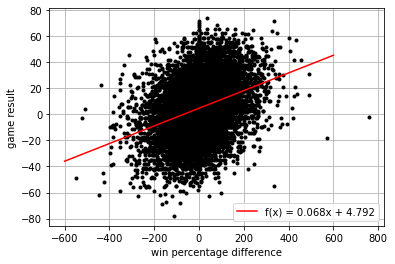

In [155]:
baseline_model = LinearRegression().fit(train_x.reshape(-1, 1), train_y)

x = np.linspace(-600, 600, 500)
y = baseline_model.coef_[0] * x + baseline_model.intercept_

plt.xlabel('win percentage difference')
plt.ylabel('game result')
plt.plot(train_x, train_y, '.', color='black')
plt.plot(x, y, '-r', label="f(x) = %.3fx + %.3f" % (baseline_model.coef_[0], baseline_model.intercept_))
plt.legend()
plt.grid()

In [133]:
prediction = baseline_model.predict(valid_x.reshape(-1, 1))
print('RMSE = %.2f points' % mean_squared_error(valid_y, prediction, squared=False))

RMSE = 99.15 points


## Logistic Regression Baseline